In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


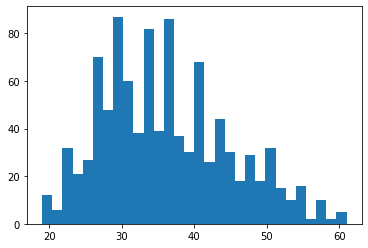

In [8]:
#Age is one of the most obvious factors that would potentially affect click rate
_ = plt.hist(ad_data['Age'], bins = 30)

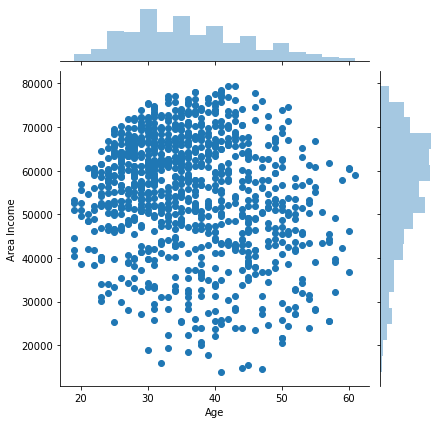

In [9]:
#Assuming Area Income is also affected by age and could be enlightning for whether they click or not
sns.jointplot(ad_data['Age'],ad_data['Area Income'])

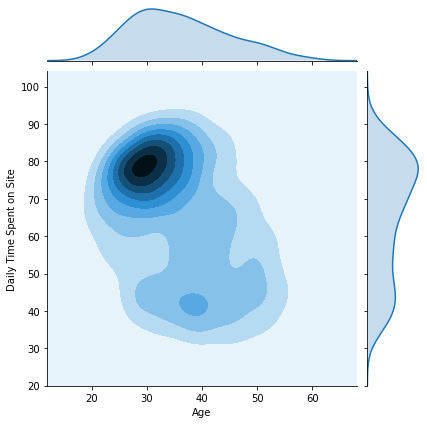

In [10]:
#Daily Time Spent on Site is also another factor that could be important in determining what the user does.
#Of course, Daily Time Spent on Site will also be very different given the user's age.
sns.jointplot(ad_data['Age'],ad_data['Daily Time Spent on Site'], kind='kde')

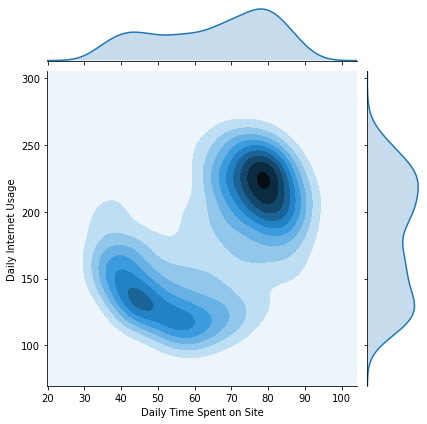

In [13]:
#Is the daily time spent on site the same as the daily internet usage?
sns.jointplot(ad_data['Daily Time Spent on Site'],ad_data['Daily Internet Usage'],kind='kde')

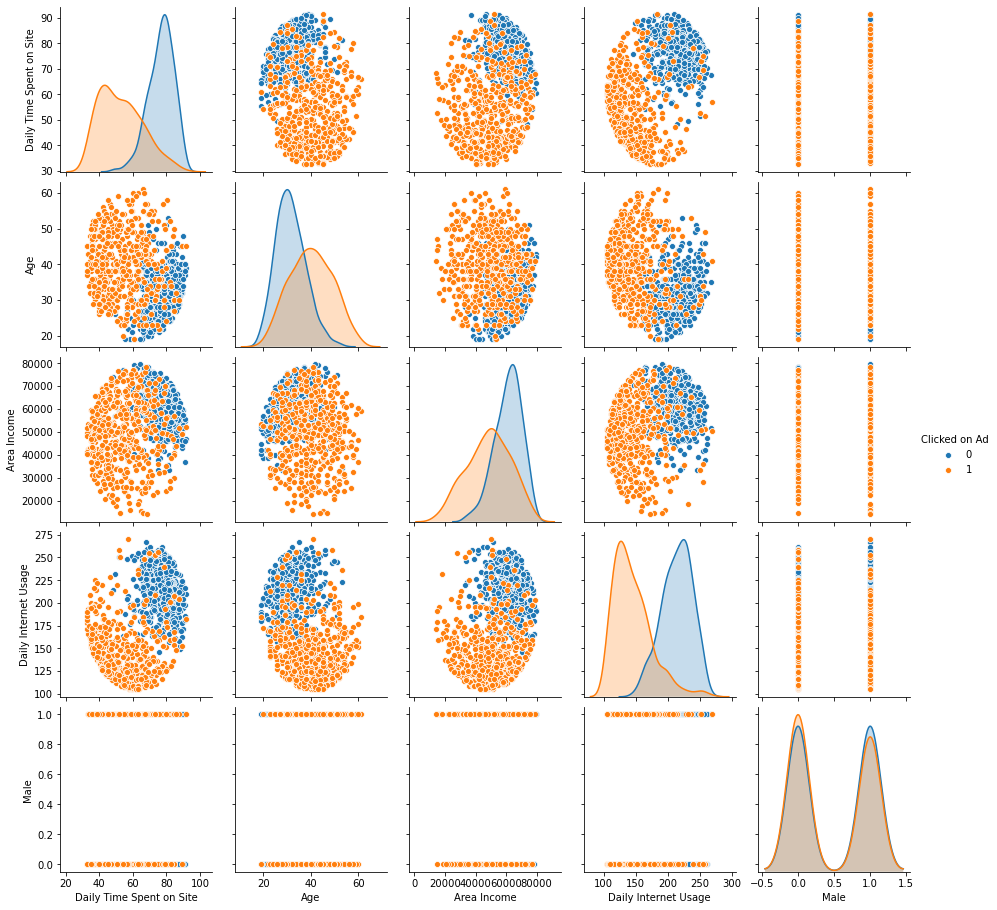

In [14]:
sns.pairplot(ad_data, hue = 'Clicked on Ad', diag_kind = 'auto')

In [15]:
## Hypothesis - User tends to click on Ad when 
## 1. Spents less time on site
# 2. Spent less time on the Internet every day

In [16]:
###Modeling
ad_data1= ad_data.copy()

In [17]:
import datetime as dt
ad_data1['Timestamp'] = pd.to_datetime(ad_data1['Timestamp'])
ad_data1['Month'] = ad_data1['Timestamp'].dt.month
ad_data1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6


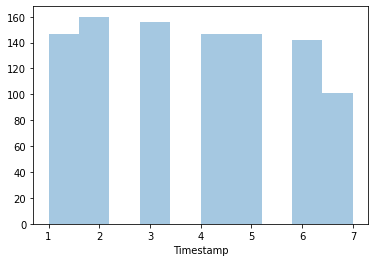

In [18]:
sns.distplot(ad_data1['Timestamp'].dt.month, kde=False)

In [19]:
#create a dummy variable for month
month_dummy = pd.get_dummies(ad_data1['Month'],drop_first=True)
country_dummy = pd.get_dummies(ad_data1['Country'],drop_first=True)

In [20]:
X1 = ad_data1.drop(['Clicked on Ad','City','Ad Topic Line','Country','Timestamp','Month'],axis=1)
X1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [21]:
X1 = pd.concat([X1,month_dummy,country_dummy],axis=1)
X1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,2,3,4,5,6,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,68.95,35,61833.90,256.09,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y1 = ad_data1['Clicked on Ad']
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression(solver = 'lbfgs')
logmodel1.fit(X1_train,y1_train)
predict1 = logmodel1.predict(X1_test)

In [26]:
#A relatively simple way is by looking at the classification report
#This gives you a quick, informative overview on how your model performs.
from sklearn.metrics import classification_report
print(classification_report(y1_test,predict1))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

